In [13]:
#import libraries
import pandas as pd
import seaborn as sns
import collections
#import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Load behavioral data

In [14]:
df = pd.read_csv("/mnt/c/Users/liz/Contacts/Desktop/ValuePercept/Behavior/HCP_behavioralData.csv")
df.shape
df.head()

(1206, 582)

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
0,100004,S900,Q06,M,22-25,False,0,0,0,0.0,...,5.2,101.12,86.45,2.0,45.9,107.17,105.31,1.80,0.0,1.80
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,6.0,108.79,97.19,1.0,49.7,72.63,72.03,1.84,0.0,1.84
2,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
3,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
4,100610,S900,Q08,M,26-30,True,2,1,4,100.0,...,2.0,122.25,110.45,0.0,38.6,84.84,85.31,1.92,1.0,1.88


# Exclude missing values from the data

In [4]:
#Detect missing values in the data
#How many Nulls for each field?
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()
type(null_columns)

dMRI_3T_ReconVrs         141
fMRI_3T_ReconVrs         108
7T_fMRI_Mov_Vrs         1022
QC_Issue                1049
MRsession_Scanner_3T      93
                        ... 
Taste_Unadj                6
Taste_AgeAdj               6
Mars_Log_Score             8
Mars_Errs                 11
Mars_Final                11
Length: 470, dtype: int64

pandas.core.indexes.base.Index

In [15]:
#Delete rows with missing values in specific columns
df = df.dropna(subset=['DDisc_AUC_200', 'DDisc_AUC_40K', 'Flanker_AgeAdj', 'Mars_Final'])
df.shape

(1195, 582)

In [8]:
""""
#Percent of missing values for each field
print (df.isnull().mean())
#Keep only the fields where there is less than 25% of missing values
df = df.loc[:, df.isnull().mean() < .25]
#The remained fields
print(df.columns)
#df.head(10)
df.shape

#Delete rows with missing values
#percent of 'normal' values for each row
df.notnull().mean(axis=1)
#Keep only the rows where there are no missing values 
df = df.loc[df.notnull().mean(axis=1) == 1, :]
df.head(10)
df.shape

Subject           0.000000
Release           0.000000
Acquisition       0.000000
Gender            0.000000
Age               0.000000
                    ...   
Taste_Unadj       0.005021
Taste_AgeAdj      0.005021
Mars_Log_Score    0.000000
Mars_Errs         0.000000
Mars_Final        0.000000
Length: 582, dtype: float64
Index(['Subject', 'Release', 'Acquisition', 'Gender', 'Age',
       '3T_Full_MR_Compl', 'T1_Count', 'T2_Count', '3T_RS-fMRI_Count',
       '3T_RS-fMRI_PctCompl',
       ...
       'Noise_Comp', 'Odor_Unadj', 'Odor_AgeAdj', 'PainIntens_RawScore',
       'PainInterf_Tscore', 'Taste_Unadj', 'Taste_AgeAdj', 'Mars_Log_Score',
       'Mars_Errs', 'Mars_Final'],
      dtype='object', length=567)


(1195, 567)

0       0.455026
1       1.000000
2       1.000000
3       1.000000
4       0.994709
          ...   
1201    1.000000
1202    0.994709
1203    1.000000
1204    1.000000
1205    1.000000
Length: 1195, dtype: float64

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,6.0,108.79,97.19,1.0,49.7,72.63,72.03,1.84,0.0,1.84
2,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
3,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
8,101309,S500,Q06,M,26-30,True,1,1,4,100.0,...,5.2,122.25,110.45,0.0,38.6,106.39,104.39,1.80,0.0,1.80
9,101410,S500,Q06,M,26-30,False,2,1,2,50.0,...,6.8,122.25,111.41,3.0,50.1,73.86,71.78,1.80,0.0,1.80
11,101915,Q3,Q04,F,31-35,True,2,2,4,100.0,...,4.4,96.87,77.61,0.0,38.6,112.11,111.70,1.84,1.0,1.80
12,102008,S500,Q06,M,22-25,False,1,1,4,100.0,...,6.0,122.25,110.45,0.0,50.1,67.48,65.31,1.80,0.0,1.80
15,102513,S900,Q10,M,26-30,True,2,2,4,100.0,...,5.2,108.79,98.04,2.0,54.3,84.07,82.37,1.92,0.0,1.92
16,102614,S1200,Q12,M,22-25,True,2,2,4,100.0,...,3.6,96.87,77.12,0.0,38.6,79.67,78.91,1.80,1.0,1.76
17,102715,S1200,Q12,M,26-30,True,2,2,4,100.0,...,5.2,93.38,69.88,1.0,38.6,86.03,86.60,1.84,0.0,1.84


(845, 567)

In [6]:
""""
#Delete fields with only one unique value
#Number of unique values for each field
df.nunique()
#Keep only the fields where there is more than one unique value
df = df.loc[:, df.nunique() > 1]
#The remained fields
print(df.columns)
df.shape

Subject           845
Release             7
Acquisition        13
Gender              2
Age                 4
                 ... 
Taste_Unadj        95
Taste_AgeAdj      178
Mars_Log_Score     11
Mars_Errs           7
Mars_Final         13
Length: 567, dtype: int64

Index(['Subject', 'Release', 'Acquisition', 'Gender', 'Age',
       '3T_Full_MR_Compl', 'T1_Count', 'T2_Count', '3T_RS-fMRI_Count',
       '3T_RS-fMRI_PctCompl',
       ...
       'Noise_Comp', 'Odor_Unadj', 'Odor_AgeAdj', 'PainIntens_RawScore',
       'PainInterf_Tscore', 'Taste_Unadj', 'Taste_AgeAdj', 'Mars_Log_Score',
       'Mars_Errs', 'Mars_Final'],
      dtype='object', length=544)


,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,6.0,108.79,97.19,1.0,49.7,72.63,72.03,1.84,0.0,1.84
2,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
3,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
8,101309,S500,Q06,M,26-30,True,1,1,4,100.0,...,5.2,122.25,110.45,0.0,38.6,106.39,104.39,1.80,0.0,1.80
9,101410,S500,Q06,M,26-30,False,2,1,2,50.0,...,6.8,122.25,111.41,3.0,50.1,73.86,71.78,1.80,0.0,1.80
11,101915,Q3,Q04,F,31-35,True,2,2,4,100.0,...,4.4,96.87,77.61,0.0,38.6,112.11,111.70,1.84,1.0,1.80
12,102008,S500,Q06,M,22-25,False,1,1,4,100.0,...,6.0,122.25,110.45,0.0,50.1,67.48,65.31,1.80,0.0,1.80
15,102513,S900,Q10,M,26-30,True,2,2,4,100.0,...,5.2,108.79,98.04,2.0,54.3,84.07,82.37,1.92,0.0,1.92
16,102614,S1200,Q12,M,22-25,True,2,2,4,100.0,...,3.6,96.87,77.12,0.0,38.6,79.67,78.91,1.80,1.0,1.76
17,102715,S1200,Q12,M,26-30,True,2,2,4,100.0,...,5.2,93.38,69.88,1.0,38.6,86.03,86.60,1.84,0.0,1.84


(845, 544)

In [7]:
#Save to csv
#df.to_csv('HCP_behavior_noMissing.csv')

In [10]:
#Age
df['Age'].unique

<bound method Series.unique of 1       26-30
2       26-30
3       31-35
8       26-30
9       26-30
        ...  
1199    26-30
1201    31-35
1203    26-30
1204    22-25
1205    26-30
Name: Age, Length: 845, dtype: object>

# Exploration of the behavioral tasks

## Perceptual task - Mars contrast test

count    1195.000000
mean        1.822251
std         0.542893
min         1.080000
25%         1.760000
50%         1.800000
75%         1.840000
max        15.000000
Name: Mars_Final, dtype: float64

<AxesSubplot:xlabel='Mars_Final'>

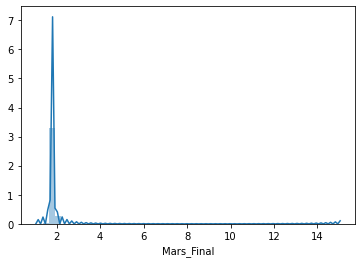

In [16]:
df['Mars_Final'].describe()

sns.distplot(df['Mars_Final'])

In [17]:
#z-score
df['z_score_mars'] = stats.zscore(df['Mars_Final'])


#Remove outliers (>3 SD)
df = df.loc[df['z_score_mars'].abs()<=3]
df.describe

<bound method NDFrame.describe of       Subject Release Acquisition Gender    Age  3T_Full_MR_Compl  T1_Count  \
0      100004    S900         Q06      M  22-25             False         0   
1      100206    S900         Q11      M  26-30              True         1   
2      100307      Q1         Q01      F  26-30              True         1   
3      100408      Q3         Q03      M  31-35              True         1   
4      100610    S900         Q08      M  26-30              True         2   
...       ...     ...         ...    ...    ...               ...       ...   
1201   992774      Q2         Q02      M  31-35              True         2   
1202   993675    S900         Q09      F  26-30              True         2   
1203   994273    S500         Q06      M  26-30              True         1   
1204   995174   S1200         Q13      M  22-25             False         1   
1205   996782    S900         Q08      F  26-30              True         2   

      T2_Count  3

<AxesSubplot:xlabel='z_score_mars'>

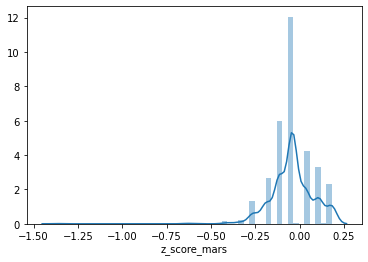

In [18]:
sns.distplot(df['z_score_mars'])

## Value-based task - delay discounting

count    1193.000000
mean        0.257488
std         0.204881
min         0.015692
25%         0.104884
50%         0.199546
75%         0.345770
max         0.984442
Name: DDisc_AUC_200, dtype: float64

<AxesSubplot:xlabel='DDisc_AUC_200'>

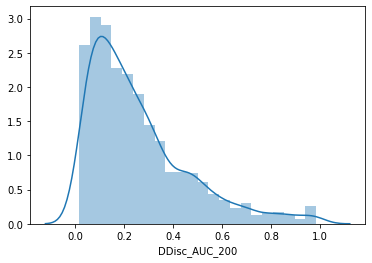

In [19]:
df['DDisc_AUC_200'].describe()

sns.distplot(df['DDisc_AUC_200'])

In [20]:
#z-score
df['z_score_DDisc_AUC'] = stats.zscore(df['DDisc_AUC_40K'])


#Remove outliers (>3 SD)
df = df.loc[df['z_score_DDisc_AUC'].abs()<=3]
df.describe

<bound method NDFrame.describe of       Subject Release Acquisition Gender    Age  3T_Full_MR_Compl  T1_Count  \
0      100004    S900         Q06      M  22-25             False         0   
1      100206    S900         Q11      M  26-30              True         1   
2      100307      Q1         Q01      F  26-30              True         1   
3      100408      Q3         Q03      M  31-35              True         1   
4      100610    S900         Q08      M  26-30              True         2   
...       ...     ...         ...    ...    ...               ...       ...   
1201   992774      Q2         Q02      M  31-35              True         2   
1202   993675    S900         Q09      F  26-30              True         2   
1203   994273    S500         Q06      M  26-30              True         1   
1204   995174   S1200         Q13      M  22-25             False         1   
1205   996782    S900         Q08      F  26-30              True         2   

      T2_Count  3

<AxesSubplot:xlabel='z_score_DDisc_AUC'>

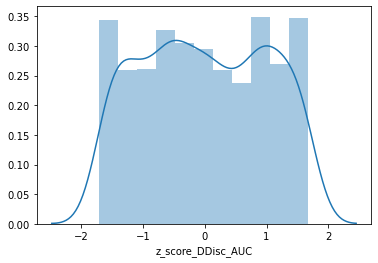

In [21]:
sns.distplot(df['z_score_DDisc_AUC'])

## Perceptual decision-making/selective attention - Flanker task

count    1193.000000
mean      101.389975
std        10.136668
min        69.310000
25%        94.780000
50%       101.610000
75%       108.920000
max       123.560000
Name: Flanker_AgeAdj, dtype: float64

<AxesSubplot:xlabel='Flanker_AgeAdj'>

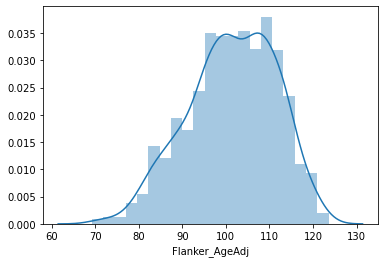

In [22]:
df['Flanker_AgeAdj'].describe()

#Scores distribution
sns.distplot(df['Flanker_AgeAdj'])

count    1190.000000
mean      101.934261
std        10.028746
min        55.390000
25%        95.247500
50%       101.895000
75%       109.590000
max       122.650000
Name: CardSort_AgeAdj, dtype: float64

<AxesSubplot:xlabel='CardSort_AgeAdj'>

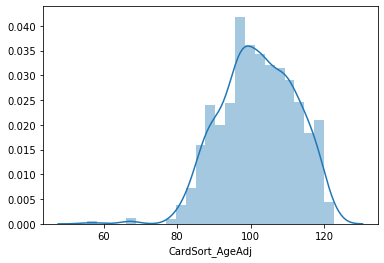

In [23]:
df['CardSort_AgeAdj'].describe()

#Scores distribution
sns.distplot(df['CardSort_AgeAdj'])

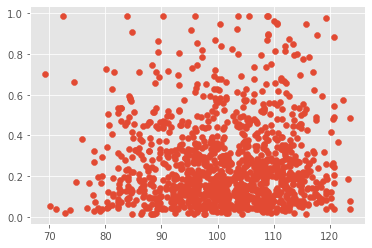

<AxesSubplot:xlabel='Flanker_AgeAdj', ylabel='DDisc_AUC_200'>

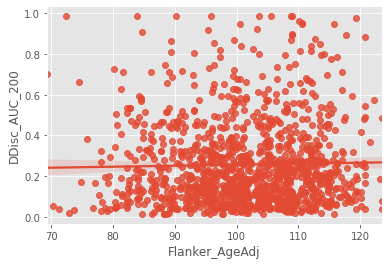

In [24]:
#Correlation between Flanker task and CardSort task
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

x = df['Flanker_AgeAdj']
y = df['DDisc_AUC_200']

#sc.stats.pearsonr(x, y)

plt.scatter(x, y)
plt.show()

sns.regplot(x, y)

In [25]:
#z-score
df['z_score_Flanker'] = stats.zscore(df['Flanker_AgeAdj'])


#Remove outliers (>3 SD)
df = df.loc[df['z_score_Flanker'].abs()<=3]
df.describe

<bound method NDFrame.describe of       Subject Release Acquisition Gender    Age  3T_Full_MR_Compl  T1_Count  \
0      100004    S900         Q06      M  22-25             False         0   
1      100206    S900         Q11      M  26-30              True         1   
2      100307      Q1         Q01      F  26-30              True         1   
3      100408      Q3         Q03      M  31-35              True         1   
4      100610    S900         Q08      M  26-30              True         2   
...       ...     ...         ...    ...    ...               ...       ...   
1201   992774      Q2         Q02      M  31-35              True         2   
1202   993675    S900         Q09      F  26-30              True         2   
1203   994273    S500         Q06      M  26-30              True         1   
1204   995174   S1200         Q13      M  22-25             False         1   
1205   996782    S900         Q08      F  26-30              True         2   

      T2_Count  3

<AxesSubplot:xlabel='z_score_Flanker'>

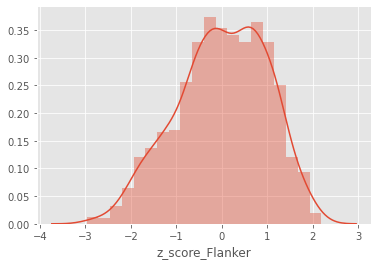

In [26]:
sns.distplot(df['z_score_Flanker'])

## Comparison between z_scores of Mars Contrast and Delay discount

In [27]:
#correlation
x = df['z_score_DDisc_AUC']
y = df['z_score_mars']
sc.stats.pearsonr(x, y)

(0.06994057622000882, 0.015772738272030823)

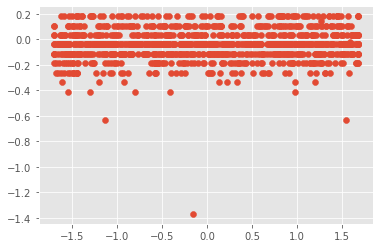

In [28]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

x = df['z_score_DDisc_AUC']
y = df['z_score_mars']

#sc.stats.pearsonr(x, y)

plt.scatter(x, y)
plt.show()

In [29]:
#Devide the subjects into 4 groups according to the z-scores in both variables
df['GroupType'] = ""

for index, row in df.iterrows():
    if row['z_score_mars'] < 0.0 and row['z_score_DDisc_AUC'] < 0.0:
        df['GroupType'][index] = 0
        #print(row)
    elif row['z_score_mars'] < 0 and row['z_score_DDisc_AUC'] > 0:
        df['GroupType'][index] = 1
    elif row['z_score_mars'] >= 0 and row['z_score_DDisc_AUC'] >= 0:
        df['GroupType'][index] = 2
    elif row['z_score_mars'] >= 0 and row['z_score_DDisc_AUC'] <= 0:
        df['GroupType'][index]= 3

df['GroupType'].unique()



/home/lizakson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/lizakson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/lizakson/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

array([0, 3, 2, 1], dtype=object)

In [30]:
#validate if the classification to groups is correct
df.head(10)

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final,z_score_mars,z_score_DDisc_AUC,z_score_Flanker,GroupType
0,100004,S900,Q06,M,22-25,False,0,0,0,0.0,...,45.9,107.17,105.31,1.80,0.0,1.80,-0.041003,-1.518970,0.949430,0
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,49.7,72.63,72.03,1.84,0.0,1.84,0.032707,-1.579802,1.496190,3
2,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,38.6,71.69,71.76,1.76,0.0,1.76,-0.114713,-0.668222,0.050336,0
3,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,52.6,114.01,113.59,1.76,2.0,1.68,-0.262134,-0.285068,1.196163,0
4,100610,S900,Q08,M,26-30,True,2,1,4,100.0,...,38.6,84.84,85.31,1.92,1.0,1.88,0.106417,1.274788,1.262287,2
5,101006,S500,Q06,F,31-35,True,2,2,4,100.0,...,38.6,123.80,123.31,1.80,0.0,1.80,-0.041003,0.976073,-0.894157,1
6,101107,S500,Q06,M,22-25,True,2,2,4,100.0,...,50.1,134.65,131.38,1.84,0.0,1.84,0.032707,0.283308,-0.513202,2
7,101208,S1200,Q12,F,31-35,False,0,0,0,0.0,...,50.1,105.57,102.32,1.92,0.0,1.92,0.180127,1.097738,-1.670872,2
8,101309,S500,Q06,M,26-30,True,1,1,4,100.0,...,38.6,106.39,104.39,1.80,0.0,1.80,-0.041003,1.557160,0.195415,1
9,101410,S500,Q06,M,26-30,False,2,1,2,50.0,...,50.1,73.86,71.78,1.80,0.0,1.80,-0.041003,-0.577881,-0.079939,0


GroupType
0    101.546241
1    101.269244
2    102.448298
3    100.503600
Name: Flanker_AgeAdj, dtype: float64


<AxesSubplot:xlabel='GroupType'>

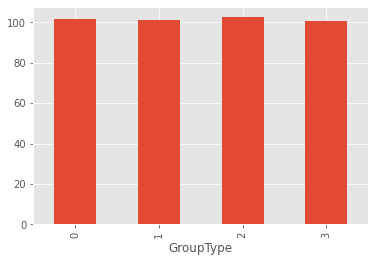

In [31]:
#Show performance in Flanker task according to the 4 groups
FT = df.groupby(['GroupType'])['Flanker_AgeAdj'].mean()
print(FT)
FT.plot(kind='bar')

In [32]:
#from: https://www.pythonfordatascience.org/anova-python/
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Flanker_AgeAdj ~ C(GroupType)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(GroupType),361.009696,3.0,1.189198,0.312588
Residual,120114.128572,1187.0,NaN,NaN


In [33]:
#Create a coloumn that compares between the two z-scores
#df['z_score_compare'] = df['z_score_mars']-df['z_score_DD200']

df['z_score_compare'] = ""

for index, row in df.iterrows():
    df['z_score_compare'][index] = abs(row['z_score_mars'] - row['z_score_DDisc_AUC'])
    
df['z_score_compare']

df.head()

/home/lizakson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/lizakson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/lizakson/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

0         1.47797
1         1.61251
2        0.553509
3       0.0229339
4         1.16837
          ...    
1201      1.57132
1202      1.63192
1203     0.206444
1204     0.536878
1205     0.463046
Name: z_score_compare, Length: 1191, dtype: object

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final,z_score_mars,z_score_DDisc_AUC,z_score_Flanker,GroupType,z_score_compare
0,100004,S900,Q06,M,22-25,False,0,0,0,0.0,...,107.17,105.31,1.80,0.0,1.80,-0.041003,-1.518970,0.949430,0,1.47797
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,72.63,72.03,1.84,0.0,1.84,0.032707,-1.579802,1.496190,3,1.61251
2,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,71.69,71.76,1.76,0.0,1.76,-0.114713,-0.668222,0.050336,0,0.553509
3,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,114.01,113.59,1.76,2.0,1.68,-0.262134,-0.285068,1.196163,0,0.0229339
4,100610,S900,Q08,M,26-30,True,2,1,4,100.0,...,84.84,85.31,1.92,1.0,1.88,0.106417,1.274788,1.262287,2,1.16837


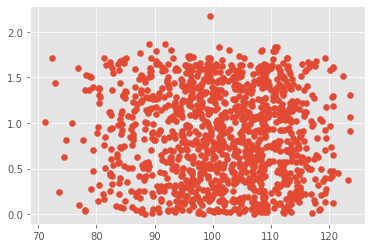

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

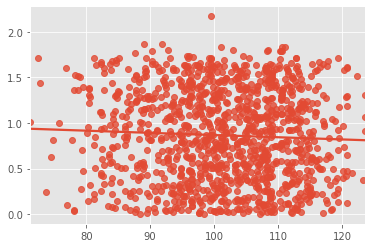

In [34]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

x = df['Flanker_AgeAdj']
y = df['z_score_compare']

plt.scatter(x, y)
plt.show()

sns.regplot(x, y)

In [35]:
#correlation

sc.stats.pearsonr(x, y)

(-0.04825275892814106, 0.09601942260341188)

count     1191.00000
unique    1113.00000
top          1.71892
freq         9.00000
Name: z_score_compare, dtype: float64

<AxesSubplot:xlabel='z_score_compare'>

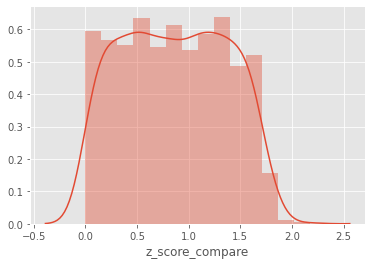

In [36]:
df['z_score_compare'].describe()

#Scores distribution
sns.distplot(df['z_score_compare'])

## Comparison between z_scores of Flanker task and Delay discount

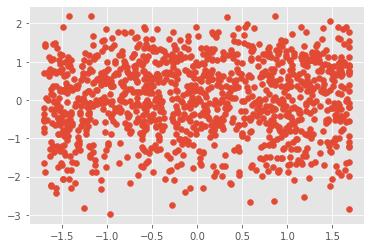

<AxesSubplot:xlabel='z_score_DDisc_AUC', ylabel='z_score_Flanker'>

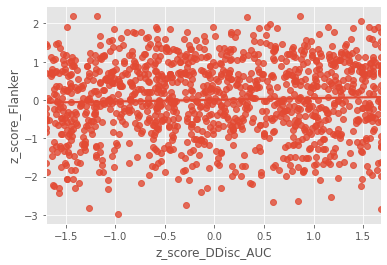

In [37]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

x = df['z_score_DDisc_AUC']
y = df['z_score_Flanker']

#sc.stats.pearsonr(x, y)

plt.scatter(x, y)
plt.show()

sns.regplot(x, y)

In [38]:
sc.stats.pearsonr(x, y)

(0.04341084278942814, 0.13432078567962563)

In [39]:
#Devide the subjects into 4 groups according to the z-scores in both variables
df['GroupType_f'] = ""

for index, row in df.iterrows():
    if row['z_score_Flanker'] < 0.0 and row['z_score_DDisc_AUC'] < 0.0:
        df['GroupType_f'][index] = 0
        #print(row)
    elif row['z_score_Flanker'] < 0 and row['z_score_DDisc_AUC'] > 0:
        df['GroupType_f'][index] = 1
    elif row['z_score_Flanker'] >= 0 and row['z_score_DDisc_AUC'] >= 0:
        df['GroupType_f'][index] = 2
    elif row['z_score_Flanker'] >= 0 and row['z_score_DDisc_AUC'] <= 0:
        df['GroupType_f'][index]= 3

df['GroupType_f'].unique()

/home/lizakson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/lizakson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/lizakson/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

array([3, 2, 1, 0], dtype=object)

In [40]:
#validate if the classification to groups is correct
df.head(10)

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final,z_score_mars,z_score_DDisc_AUC,z_score_Flanker,GroupType,z_score_compare,GroupType_f
0,100004,S900,Q06,M,22-25,False,0,0,0,0.0,...,105.31,1.80,0.0,1.80,-0.041003,-1.518970,0.949430,0,1.47797,3
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,72.03,1.84,0.0,1.84,0.032707,-1.579802,1.496190,3,1.61251,3
2,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,71.76,1.76,0.0,1.76,-0.114713,-0.668222,0.050336,0,0.553509,3
3,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,113.59,1.76,2.0,1.68,-0.262134,-0.285068,1.196163,0,0.0229339,3
4,100610,S900,Q08,M,26-30,True,2,1,4,100.0,...,85.31,1.92,1.0,1.88,0.106417,1.274788,1.262287,2,1.16837,2
5,101006,S500,Q06,F,31-35,True,2,2,4,100.0,...,123.31,1.80,0.0,1.80,-0.041003,0.976073,-0.894157,1,1.01708,1
6,101107,S500,Q06,M,22-25,True,2,2,4,100.0,...,131.38,1.84,0.0,1.84,0.032707,0.283308,-0.513202,2,0.250601,1
7,101208,S1200,Q12,F,31-35,False,0,0,0,0.0,...,102.32,1.92,0.0,1.92,0.180127,1.097738,-1.670872,2,0.917611,1
8,101309,S500,Q06,M,26-30,True,1,1,4,100.0,...,104.39,1.80,0.0,1.80,-0.041003,1.557160,0.195415,1,1.59816,2
9,101410,S500,Q06,M,26-30,False,2,1,2,50.0,...,71.78,1.80,0.0,1.80,-0.041003,-0.577881,-0.079939,0,0.536878,0


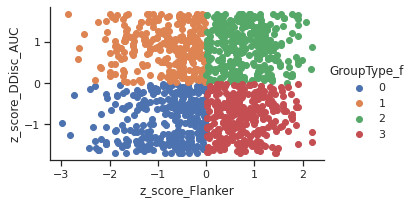

In [41]:
#Plot the classification
from  matplotlib import pyplot
import seaborn
seaborn.set(style='ticks')

fg = seaborn.FacetGrid(data=df, hue='GroupType_f', aspect=1.61)
fg.map(pyplot.scatter, 'z_score_Flanker', 'z_score_DDisc_AUC').add_legend()

In [42]:
#Create a coloumn that compares between the two z-scores
#df['z_score_compare'] = df['z_score_mars']-df['z_score_DD200']

df['z_score_compare_f'] = ""

for index, row in df.iterrows():
    df['z_score_compare_f'][index] = abs(row['z_score_Flanker'] - row['z_score_DDisc_AUC'])
    
df['z_score_compare_f']

/home/lizakson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/lizakson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/lizakson/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

0          2.4684
1         3.07599
2        0.718558
3         1.48123
4       0.0125004
          ...    
1201       3.1082
1202      1.01683
1203      1.26234
1204      0.75546
1205     0.604949
Name: z_score_compare_f, Length: 1191, dtype: object

count     1191.000000
unique    1189.000000
top          0.930808
freq         2.000000
Name: z_score_compare_f, dtype: float64

<AxesSubplot:xlabel='z_score_compare_f'>

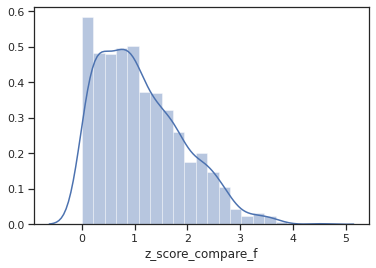

In [43]:
df['z_score_compare_f'].describe()

#Scores distribution
sns.distplot(df['z_score_compare_f'])

In [44]:
#Save to csv
df.to_csv('HCP_behavior_includeZscores.csv')